## 导入必要的库

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification

# I will try to complete the program without the module
# from sklearn.model_selection import train_test_split
# Import the JY_Toolkit that complete by my hands
import os,sys
parentdir = os.path.dirname(os.path.abspath('.'))
temp_path = os.path.join(parentdir,'JY_Toolkit')
sys.path.insert(0,temp_path)
# from JY_Toolkit import Jy_makeDataset,Jy_dataSetProcess
import JY_Toolkit

random_seed = 5225


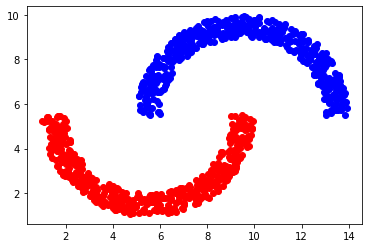

In [191]:
JY_Toolkit.Jy_makeDataset.random_state(4432)    # 设置随机数种子

X,y = JY_Toolkit.Jy_makeDataset.draw_HalfMoon(n_sample=1000,ver_distance=0,slope=0)

fig = plt.figure(num = 'X')
plot_1 = fig.add_subplot(111)
# X
p_point_x1 = [ X[i,0] for i in range(len(X)) if y[i] == 1]
p_point_x2 = [ X[i,1] for i in range(len(X)) if y[i] == 1]
n_point_x1 = [ X[i,0] for i in range(len(X)) if y[i] == -1]
n_point_x2 = [ X[i,1] for i in range(len(X)) if y[i] == -1]

plot_1.scatter(p_point_x1,p_point_x2,color = 'blue')
plot_1.scatter(n_point_x1,n_point_x2,color = 'red')
plt.show()

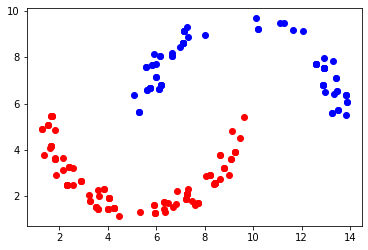

In [192]:
X_train,X_valid,y_train,y_valid = JY_Toolkit.Jy_dataSetProcess.Jy_train_test_split(X,y)

p_point_x1 = [ X_valid[i,0] for i in range(len(X_valid)) if y_valid[i] == 1]
p_point_x2 = [ X_valid[i,1] for i in range(len(X_valid)) if y_valid[i] == 1]
n_point_x1 = [ X_valid[i,0] for i in range(len(X_valid)) if y_valid[i] == -1]
n_point_x2 = [ X_valid[i,1] for i in range(len(X_valid)) if y_valid[i] == -1]

fig = plt.figure(num = 'X')
plot_1 = fig.add_subplot(111)
plot_1.scatter(p_point_x1,p_point_x2,color = 'blue')
plot_1.scatter(n_point_x1,n_point_x2,color = 'red')
plt.show()


## LMS 最小均方算法

In [193]:
class Perceptron(object):
    # fit training data to get a Suitable parameters
    def __init__(self,
                 # the dimension of the parameter (dim(x))
                 w_dim,
                 epoch=10,           # the train times
                 l_rate=0.01):       # learning rate
        self.w = np.ones(w_dim + 1, dtype=np.float32)
        self.l_rate = l_rate
        self.epoch = epoch
        self.lost = []
        self.dis = []

    def sign(self, x):
        y = float(np.dot(x, self.w))
        if y >= 0:
            return 1
        else:
            return -1

    def weighted_sum(self,x):
        return float(np.dot(x,self.w))

    def weighted_sum_all(self,X):
        return np.dot(X,self.w)

    def fit(self,
            # input features set -- type should be `numpy.ndarray` (best)
            X_train,
            y_train):           # Expected label/output

        temp = np.ones(len(X_train))
        X_train = np.column_stack((X_train, temp))  # up X dimension
        del temp                # Recycle temp
        
        self.lost.clear()   # claer the list of lost
        self.dis.clear()
        dis_temp = 0
        lost_count = 0
        for iter_ in range(self.epoch):
            for i in range(len(X_train)):
                x = X_train[i]
                y = y_train[i]
                # SGD 
                fit_res = self.sign(x)
                if y != fit_res:
                    lost_count += 1
                    dis_temp += abs(float(y - float(np.dot(x,self.w))))
                    # # solution 1
                    # self.w  = self.w + self.l_rate*(y - fit_res)*x
                    # solution 2
                self.w  = self.w + self.l_rate*(y - float(np.dot(x,self.w)))*x

            self.lost.append(lost_count)
            self.dis.append(dis_temp)
            if iter_%5 == 0:
                print('iter_:',iter_,'lost:',lost_count/len(X_train),f'dis_value = {dis_temp}',f'learning_rate = {self.l_rate}')

            lost_count = 0
            dis_temp = 0

    def predict(self,X_test):
        temp = np.ones(len(X_test))
        X_test = np.column_stack((X_test, temp))  # up X dimension
        del temp                # Recycle temp
        y_predict = list(map(lambda x : 1 if x >= 0 else -1,list(self.weighted_sum_all(X_test))))
        return np.array(y_predict)

    def score(self,y,label):
        accuracy = 0
        for i in range(len(y)):
            if  y[i] == label[i]:
                accuracy += 1
        return accuracy / len(label), len(label) - accuracy
        
    pass


In [194]:
if __name__ == '__main__':

    perceptron = Perceptron(X_train.shape[1],epoch=50,l_rate= 0.001)
    perceptron.fit(X_train, y_train)
    y_predict = perceptron.predict(X_valid)
    accuracy_rate, lost_count = perceptron.score(y_valid, y_predict)
    print('score:',accuracy_rate,'valid lost:',lost_count,'last lost:',perceptron.lost[len(perceptron.lost)-1])
    print(f'w:{perceptron.w}')
    

iter_: 0 lost: 0.515 dis_value = 630.0842180362872 learning_rate = 0.001
iter_: 5 lost: 0.155 dis_value = 150.62491008957127 learning_rate = 0.001
iter_: 10 lost: 0.0475 dis_value = 41.7417359630103 learning_rate = 0.001
iter_: 15 lost: 0.02 dis_value = 17.59682820700386 learning_rate = 0.001
iter_: 20 lost: 0.02 dis_value = 17.313661397989762 learning_rate = 0.001
iter_: 25 lost: 0.02125 dis_value = 18.23998171938195 learning_rate = 0.001
iter_: 30 lost: 0.02375 dis_value = 20.259158440614968 learning_rate = 0.001
iter_: 35 lost: 0.02375 dis_value = 20.2812639300483 learning_rate = 0.001
iter_: 40 lost: 0.025 dis_value = 21.297896584756764 learning_rate = 0.001
iter_: 45 lost: 0.02375 dis_value = 20.308843476337557 learning_rate = 0.001
score: 0.9849246231155779 valid lost: 3 last lost: 19
w:[ 0.05543931  0.29046258 -1.97375774]


-0.19086559100958522 6.795222164605777


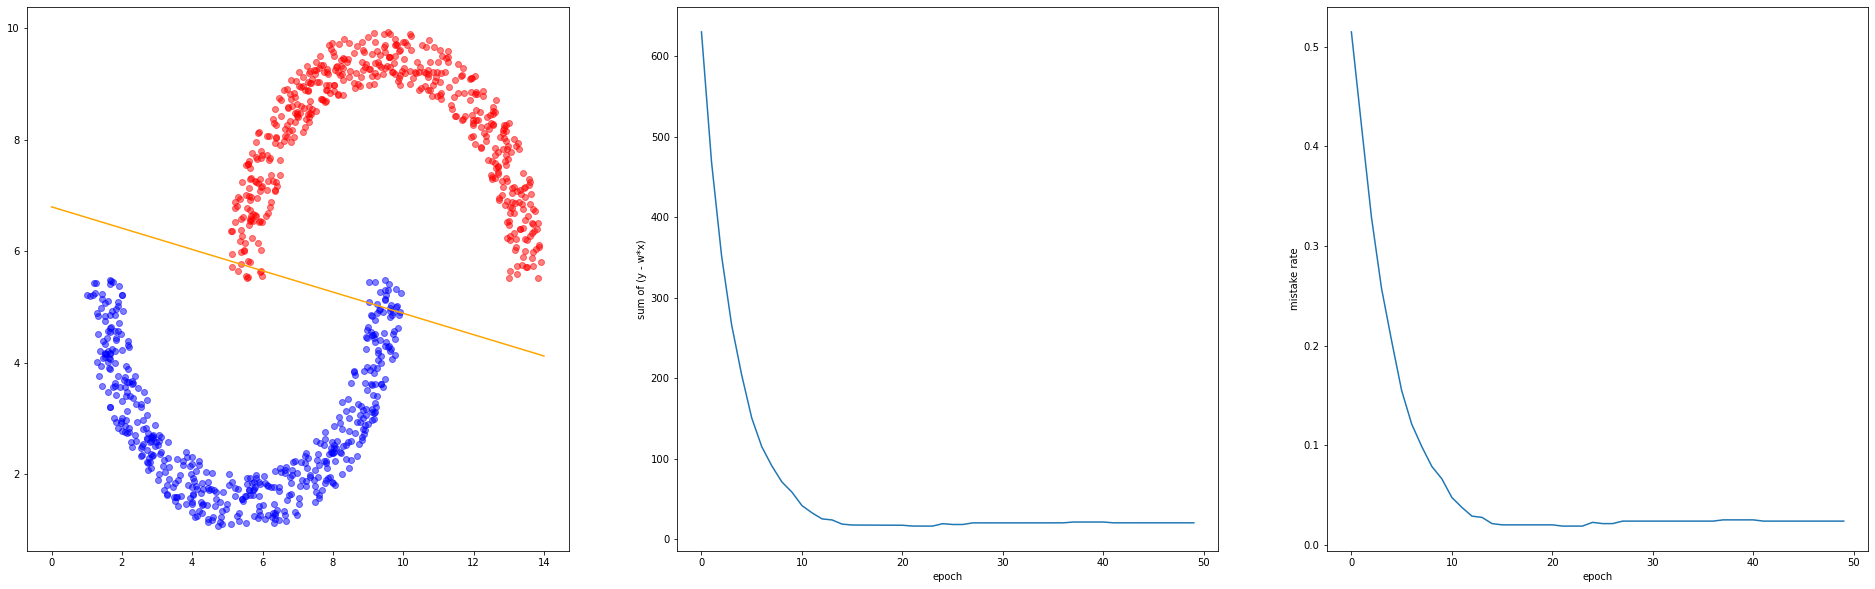

In [195]:
if __name__ == '__main__': 
    # plt
    positive_f1 = [X[i][0] for i in range(len(X)) if y[i] == 1]
    positive_f2 = [X[i][1] for i in range(len(X)) if y[i] == 1]
    negetive_f1 = [X[i][0] for i in range(len(X)) if y[i] == -1]
    negetive_f2 = [X[i][1] for i in range(len(X)) if y[i] == -1]

    # mistake_f1_pre = [X[i][0] for i in range(len(X)) if y_predict[i] != y[i]]
    # mistake_f2_pre = [X[i][1] for i in range(len(X)) if y_predict[i] != y[i]]


    fig = plt.figure(num=1,figsize=(33,10))
    ax1 = fig.add_subplot(131)

    ax1.scatter(positive_f1,positive_f2,c = 'red',alpha=0.5)
    ax1.scatter(negetive_f1,negetive_f2,c = 'blue',alpha=0.5)

    line_x = np.linspace(0,14,100)
    # line_x = np.linspace(-3,3,100)

    line_w = -1*(perceptron.w[0]/perceptron.w[1])
    line_b = -1*(float(perceptron.w[2])/perceptron.w[1])

    line_y = list(map(lambda x : x*line_w + line_b ,line_x))

    ax1.plot(line_x,line_y,c = 'orange')

    ax2 = fig.add_subplot(132)

    ax2.set_xlabel('epoch')
    ax2.set_ylabel('sum of (y - w*x)')

    # ax2.scatter(mistake_f1_pre,mistake_f2_pre,c = 'orange',alpha=0.5)
    # ax2.plot(line_x,line_y,c = 'orange')
    ax2.plot(range(len(perceptron.dis)),perceptron.dis)

    ax3 = fig.add_subplot(133)
    ax3.plot(range(len(perceptron.lost)),list(map(lambda x : x/len(X_train),perceptron.lost)))
    ax3.set_xlabel('epoch')
    ax3.set_ylabel('mistake rate')
    print(line_w,line_b)

    plt.show()
